# Exploratory Data Analysis

 <img src="./images/meme3.png"
     alt="another meme"
     width="300"
     height="300"
     style="float: left; margin-right: 10px;" />

## Imports & Settings (hidden)

In [7]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(5,5)})
%run help_functions.ipynb

## Load & Prepare Data (hidden)

In [8]:
food = pd.read_csv("./data/food_train.csv")
food_test = pd.read_csv("./data/food_test.csv")
ntr = pd.read_csv("./data/nutrients.csv")
food_ntr = pd.read_csv("./data/food_nutrients.csv")

## Introduction

Welcome!

In this notebook we'll walk through our data exploration process and through our findings.
First, we start by looking at the main and most important dataset, which is of course *food_train.csv*. Let's have a look:

In [9]:
food.head(2)

,idx,brand,description,ingredients,serving_size,serving_size_unit,household_serving_fulltext,category
0,1,brix chocolate,milk chocolate,"sugar, cocoa butter, whole milk, chocolate liq...",28.0,g,1 onz,chocolate
1,2,target stores,frosted sugar cookies,"sugar, enriched bleached wheat flour (flour, n...",38.0,g,1 cookie,cookies_biscuits


Precentages of null values:

In [10]:
food.isna().sum()/len(food)*100

idx                           0.000000
brand                         0.000000
description                   0.000000
ingredients                   0.125980
serving_size                  0.000000
serving_size_unit             0.000000
household_serving_fulltext    0.034645
category                      0.000000
dtype: float64

Only 2 features with missing data, but in very very small percentages, so no reason to worry about missing values!

So, we can see that out of 6 features in this dataset, 4 (brand, description, ingredients and household_servring_fulltext) are textual features.
The only numeric feature is serving_size, and the last one - serving_size_unit - is categorical.

## Serving size unit

Let's start with the most simple one - **serving_size_unit**

In [11]:
food[["serving_size_unit", "category"]].groupby(["serving_size_unit", "category"]).size()

serving_size_unit  category                            
g                  cakes_cupcakes_snack_cakes              3785
                   candy                                   7577
                   chips_pretzels_snacks                   3680
                   chocolate                               3772
                   cookies_biscuits                        5284
                   popcorn_peanuts_seeds_related_snacks    7645
ml                 cakes_cupcakes_snack_cakes                 1
                   candy                                      7
dtype: int64

Only 8 products with *ml*, the rest in grams. So doesn't look interesting :(

## Serving size

We'll continue with **serving_size**, and see its distribution by category: (code hidden)

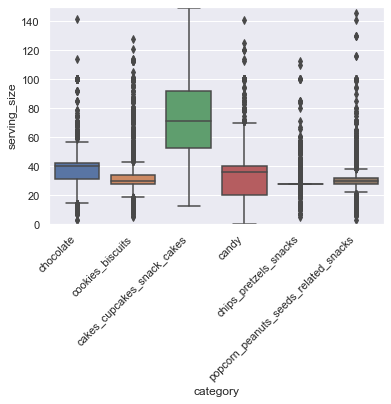

In [12]:
ax = sns.boxplot(x="category", y="serving_size", data=food)
ax.set_ylim([0,150])
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation = 45, horizontalalignment='right')

We see that for the *cakes_cupcakes_snack_cakes* category, and serving_size values are significantly higher than for the other categories, but for all other categories the distribution of values is similar, more or less (candy is also a bit different than the others categories, but not by much).
We can conclude from this that this feature might be useful for prediction, ecpesially for the *cakes_cupcakes_snack_cakes* category.

## Brands

Let's move on to **Brands**!

How many brands are there?

In [13]:
len(food.brand.unique())

4783

That's quite a lot, considering the size of the dataset.

How are they distributed? Do all brands have a similar amount of products? or do some have a lot and others only a few?

In [14]:
v = food.brand.value_counts()
print(np.mean(v))
print(np.median(v))

6.638302320719214
1.0


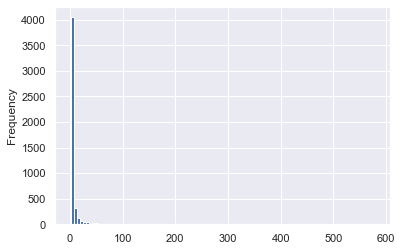

In [15]:
_ = v.plot(kind='hist', bins=100)

Well, there are some brands with almost 600 different products (so few we can't see it in the graph), but obviously most of them have just a few products in this dataset (Average is 6.64).
Let's look only at brands with less than 20 products, so we can actually see the distribution better:

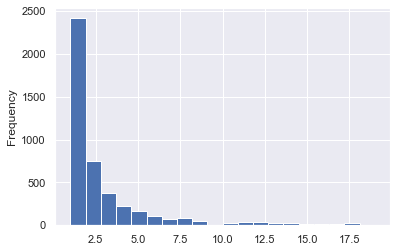

In [16]:
_ = v[v < 20].plot(kind='hist', bins=20)

So yeah, most brands have only a few products.

Now, we thought it will be interesting to see if there are **"expert brands"**, meaning brands that specialize in only 1 category. This might help us better understand how useful the brand feature is, because if many brands only specialize in little categories than it is a strong indicator of the category, and vice versa.

The following code (hidden) returns all brands that only appear in 1 category, and have more than 30 products each.

In [17]:
n_products = 30
brand_that_make_products_for_one_cat =expert_brands_category(n_products).sort_values(["category", "num_of_foods"], ascending= False)
brand_that_make_products_for_one_cat

,brand,num_of_foods,category
5,nabisco food company,118,popcorn_peanuts_seeds_related_snacks
4,"john b. sanfilippo & son, inc.",104,popcorn_peanuts_seeds_related_snacks
9,"star snacks co., inc.",71,popcorn_peanuts_seeds_related_snacks
3,hines nut company,41,popcorn_peanuts_seeds_related_snacks
0,"abimar foods, inc.",36,cookies_biscuits
10,sunmark,95,candy
11,wm. wrigley jr. company,80,candy
6,perfetti van melle usa inc.,52,candy
2,charms company,42,candy
1,american licorice company,35,candy


So, these brands will likely be very indicative of their cagetories.

Let's see the whole histogram of number of products per brand, for only those "expert brands":

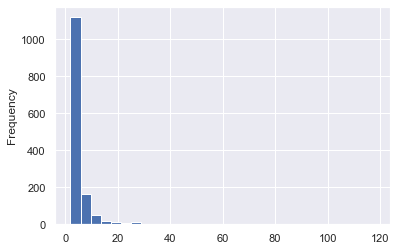

In [18]:
_ = expert_brands_category(1).num_of_foods.plot(kind='hist', bins=30)

So, like we've seen for all brands in general - most of these brands have only very few products, so we can't count on them being very useful for prediction, as it might be the case that they have also other categories which we've just not seen yet. But for those few expert brands with high number of products - the brand feature will probably be very useful.

Does the number of "expert brands" and the number of products they have vary between the categories? Let's have a look at all "expert brands" with 20 or more products, per category:

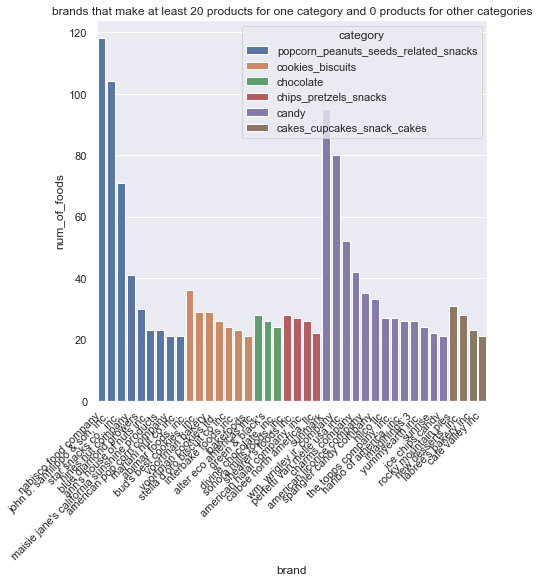

In [19]:
plot_expert_brands(20)

Cool, so we see that 'candy' and 'popcorn_peanuts_seeds_related_snacks' categories have more expert brands, while 'chocolate', 'chips_pretzels_snacks' and 'cakes_cupcakes_snack_cakes' have only 3-4 brands like this, so there is some difference in that sense, so probably it will be easier to predict for 'candy' and 'popcorn_peanuts_seeds_related_snacks' categories using the brand data than for the rest.

## Ingredients

Let's move on to...**Ingredients!**

First, let's look just at the number of different ingredients by category: (code hidden)

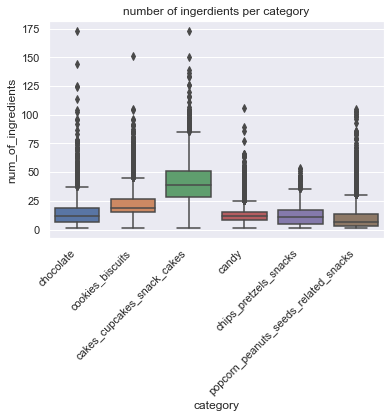

In [20]:
food['num_of_ingredients'] = food['ingredients'].apply(lambda x: len(str(x).split(',')))

ax = sns.boxplot(x='category', y='num_of_ingredients', data=food)
ax.set_title('number of ingerdients per category')
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation = 45, horizontalalignment='right')

we see that 'cakes_cupcakes_snack_cakes' category has more ingredients than all others categories, and it seems pretty significant difference. Might be useful to add number of ingredients as a new feature!

Let's check the same again without to see the other differences better: (code hidden)

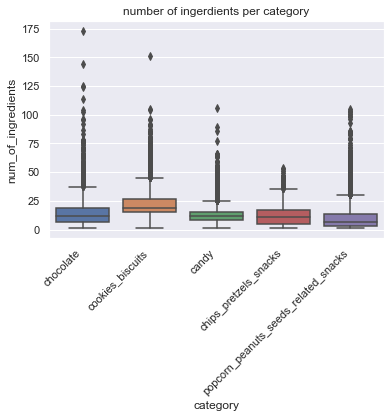

In [21]:
ax = sns.boxplot(x='category', y='num_of_ingredients', data= food[food['category']!= 'cakes_cupcakes_snack_cakes'])
ax.set_title('number of ingerdients per category')
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation = 45, horizontalalignment='right')

Yes, 'cookies_biscuits' have a bit more ingredients than other categories...

Let's have a look at the 5 most common ingredients for each category, and see if knowing these ingredients helps us predict the category.
In the following 6 graphs (1 for each category), we see the percentage of products in each category out of all products that contain the 5 most common ingredients (for the specific category we're looking at).

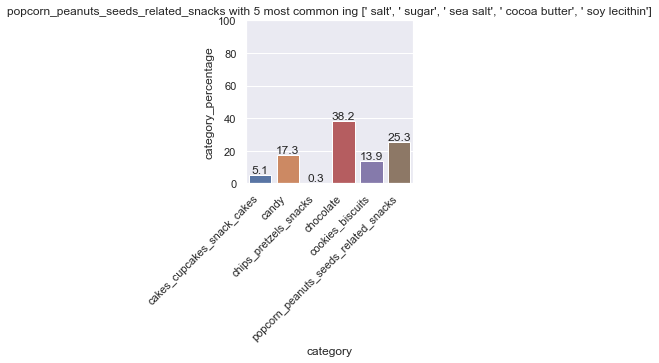

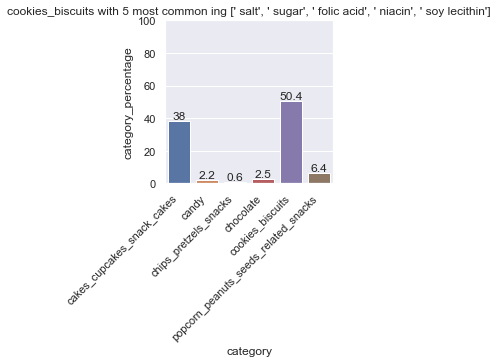

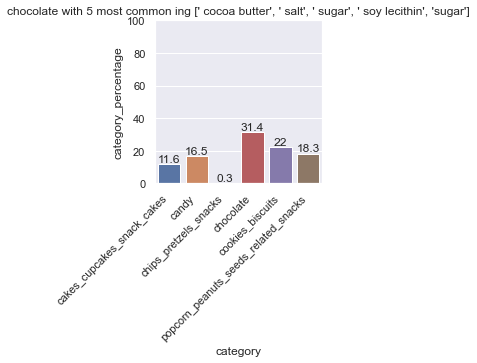

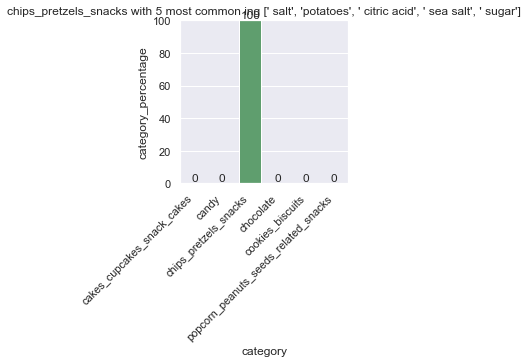

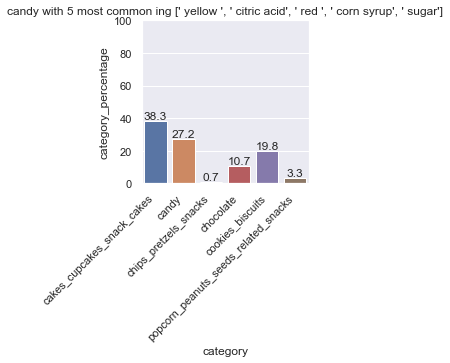

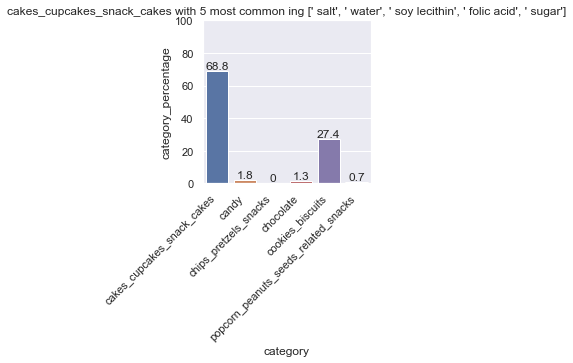

In [22]:
sns.set(rc={'figure.figsize':(3,3)})
plot_common_ing(5)

What can we learn from this?

- 'popcorn_peanuts_seeds_related_snacks': not only that the 5 most common ingredients do not predict this category, but they are actually more common in many other categories.
- 'cookies_biscuits': half of these products are actually from this category, but we also see they are common in 'cakes_cupcakes_snack_cakes'.
- 'chocolate': common in 'chocolate' but also common in all other categories, except 'chips_pretzels_snacks'.
- 'chips_pretzels_snacks': This one is nice - these 5 ingredients only appear in the 'chips_pretzels_snacks' category, so yeah, as one could expect - potatos are a strong indicator for chips category :)
- 'candy': same as 'popcorn_peanuts_seeds_related_snacks' - not very indicative.
- 'cakes_cupcakes_snack_cakes': quite indicative! 70% of products that have these ingredients are from this category. Also popular in 'cookies_biscuits'.

And to conclude: seems that some ingredients that are also very popular, will be good indicators for category, but not always.

## Household serving fulltext

Let's look a bit into the **household_serving_fulltext** feature now:

What are the most common words in this feature? how many times they appear? (code hidden)

In [23]:
common_household_serving_words = dict()
def add_to_dict(sentence):
    words = str(sentence).split()
    for word in words:
        try:
            float(word)
        except:
            if word in common_household_serving_words:
                common_household_serving_words[word] += 1
            else:
                common_household_serving_words[word] = 1

_ = food['household_serving_fulltext'].apply(lambda x: add_to_dict(x))

df_common_household_serving_words = pd.DataFrame(list(common_household_serving_words.items()), columns = ['Name','Value'])
df_common_household_serving_words.sort_values(by=['Value'], inplace= True, ascending= False)

_ = food['household_serving_fulltext'].apply(lambda x: add_to_dict(x))

df_common_household_serving_words = pd.DataFrame(list(common_household_serving_words.items()), columns = ['Name','Value'])
df_common_household_serving_words.sort_values(by=['Value'], inplace= True, ascending= False)

In [24]:
df_common_household_serving_words.head(5)

,Name,Value
0,onz,15540
3,pieces,11238
12,cup,6944
2,cookies,4036
1,cookie,2298


Ok, but are these common words interesting? do they tell us something about the category? Let's see: (code hidden)

To get a better understanding, we'll want a tabular format where we can both see how much a word is **popular** in the category (2nd column), and also the percentage of this category out of all the appreances of this word (3rd column).
We'll look at the 3 most popular words in each sense, for each category: (code hidden)

In [25]:
mixed_table_house = get_top_common_words(
    number_of_common_words=3,
    df_common_words=df_common_household_serving_words, 
    column="household_serving_fulltext", 
    func=common_words_category, 
    col_func_name='percentage_words',
    other_func=category_if_word, 
    col_other_func_name='category_percentage', 
    words_to_check=50
)

mixed_table_house.rename(
    {
        'percentage' : 'prods with word in category / all prods in category',
        'percentage_2' : 'prods with word in category / all prods with word'
    }, 
    axis=1,
    inplace=True
)

mixed_table_house.sort_values(mixed_table_house.columns[2], ascending=False).drop_duplicates()

,word,prods with word in category / all prods in category,prods with word in category / all prods with word,category
18,danish,1.45,100.00,cakes_cupcakes_snack_cakes
19,donuts,2.17,100.00,cakes_cupcakes_snack_cakes
20,donut,4.99,100.00,cakes_cupcakes_snack_cakes
30,wafers,2.50,99.25,cookies_biscuits
0,cake,29.50,98.94,cakes_cupcakes_snack_cakes
7,chips,9.46,98.86,chips_pretzels_snacks
31,cookies,38.25,98.54,cookies_biscuits
21,cane,0.79,98.36,candy
32,cookie,59.39,97.97,cookies_biscuits
22,lollipop,1.03,95.12,candy


We can also plot this with the x-axis being the 2nd column and y-axis the 3rd column: (code hidden)

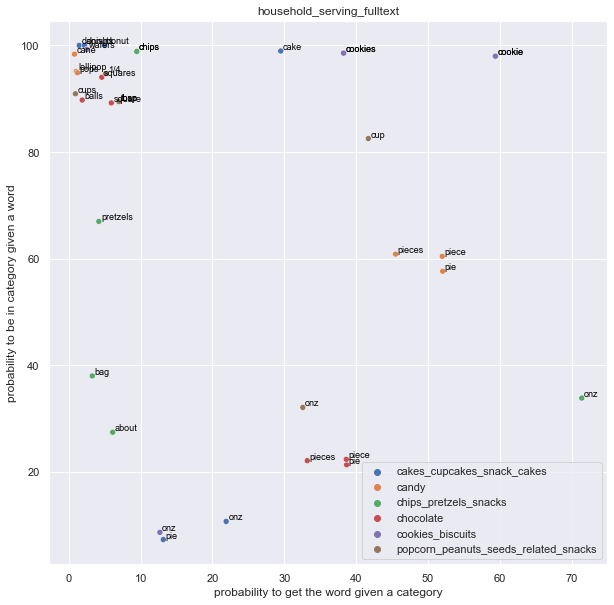

In [26]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    data=mixed_table_house, 
    x=mixed_table_house.columns[1], 
    y=mixed_table_house.columns[2], 
    hue="category"
)
for i in range(mixed_table_house.shape[0]):
    plt.text(
        x=mixed_table_house[mixed_table_house.columns[1]][i]+0.3,
        y=mixed_table_house[mixed_table_house.columns[2]][i]+0.3,
        s=mixed_table_house.word[i], 
        fontdict=dict(color='black',size=9)
    )
plt.xlabel('probability to get the word given a category')
plt.ylabel('probability to be in category given a word')
plt.legend(loc='lower right')
_ = plt.title('household_serving_fulltext')

Well, here we can see better that there are some words (like cookies, cookie, cup, pieces) that have high precentages in both categories, which means they're pretty interesting for prediction. But we also see some words (like onz, grm), while having the highest precetage of appearances in the category, are still not indicative and also don't appear that much in the category.

We can assume that most other words, that do not appear here because their percentages are even lower, will not be very useful for prediction.

## Description

Yalla, let's move on to **description:**

What are the most common words in this feature? (individually)
(code hidden)

In [27]:
common_words = dict()
def add_to_dict(sentence):
    words = sentence.split()
    for word in words:
        word = re.sub(r'[^a-zA-Z ]', '', word)
        if(len(word) < 2):
            continue
        if word in common_words:
            common_words[word] += 1
        else:
            common_words[word] = 1

_ = food['description'].apply(lambda x: add_to_dict(x))

df_common_words = pd.DataFrame(list(common_words.items()), columns = ['Name','Value'])
df_common_words.sort_values(by=['Value'], inplace= True, ascending= False)
df_common_words.head(10)

,Name,Value
1,chocolate,6849
4,cookies,3226
193,candy,3097
18,chips,2671
0,milk,1988
115,dark,1857
100,with,1580
103,potato,1412
57,roasted,1399
28,cake,1310


Similarly to 'household_serving_fulltext', let's look at a table containing both "prods with word / all prods in category" and "prods with word in category / all prods with word": (code hidden)

In [28]:
mixed_table_desc = get_top_common_words(
    number_of_common_words=3,
    df_common_words=df_common_words, 
    column="description", 
    func=common_words_category, 
    col_func_name='percentage_words',
    other_func=category_if_word, 
    col_other_func_name='category_percentage', 
    words_to_check=50
)

mixed_table_desc.rename(
    {
        'percentage' : 'prods with word in category / all prods in category',
        'percentage_2' : 'prods with word in category / all prods with word'
    }, 
    axis=1,
    inplace=True
)

In [29]:
mixed_table_desc.sort_values(mixed_table_desc.columns[2], ascending=False).drop_duplicates()

,word,prods with word in category / all prods in category,prods with word in category / all prods with word,category
24,tortilla,18.40,99.71,chips_pretzels_snacks
33,trail,9.60,99.59,popcorn_peanuts_seeds_related_snacks
34,cashews,8.67,98.66,popcorn_peanuts_seeds_related_snacks
25,potato,37.61,98.16,chips_pretzels_snacks
30,cookies,58.59,97.79,cookies_biscuits
35,popcorn,12.01,97.35,popcorn_peanuts_seeds_related_snacks
12,cookie,68.15,95.85,cookies_biscuits
0,cake,55.60,94.18,cakes_cupcakes_snack_cakes
26,chips,67.39,94.12,chips_pretzels_snacks
21,candy,36.17,90.65,candy


And we can plot is similarly, as well: (code hidden)

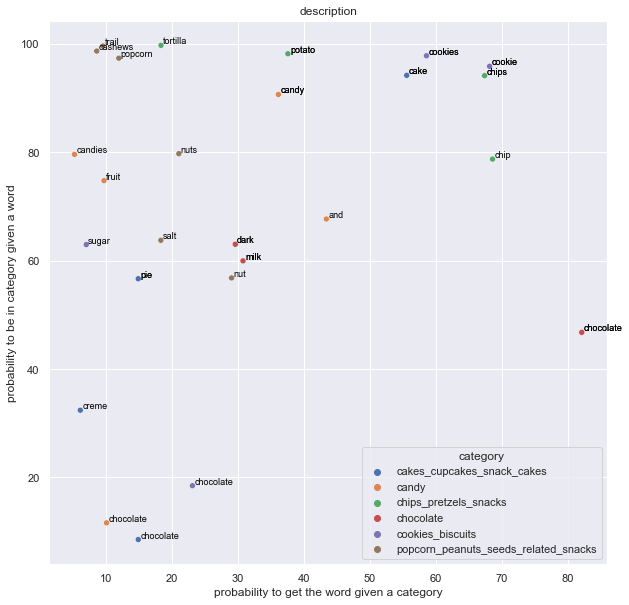

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    data=mixed_table_desc, 
    x=mixed_table_desc.columns[1], 
    y=mixed_table_desc.columns[2], 
    hue="category"
)
for i in range(mixed_table_house.shape[0]):
    plt.text(
        x=mixed_table_desc[mixed_table_desc.columns[1]][i]+0.3,
        y=mixed_table_desc[mixed_table_desc.columns[2]][i]+0.3,
        s=mixed_table_desc.word[i], 
        fontdict=dict(color='black',size=9)
    )
plt.xlabel('probability to get the word given a category')
plt.ylabel('probability to be in category given a word')
_ = plt.title('description')

Here we see, compared to 'household_full_text', more words that have a high score in both categories, and we can assume that this feature will be more helpful in the prediction process.

## Nutrients

And the last feature: **Nutrients!** For this, we'll first combine the 2 dataset that contain information about nutrients with the main one:

Is there a difference in the number of different nutrients in each category? (code hidden)

In [31]:
food_nutrient_category = merge_train_food_nutirents_nutrients().groupby(
    ["category","name"], 
    as_index = False
).mean()[["category","name", "amount"]]

food_nutrient_category.groupby(["category"], as_index = False).count()[["category", 'name']]

,category,name
0,cakes_cupcakes_snack_cakes,37
1,candy,36
2,chips_pretzels_snacks,40
3,chocolate,38
4,cookies_biscuits,40
5,popcorn_peanuts_seeds_related_snacks,41


Nope, seems like they're more or less the same...

Maybe let's look at the average number of nutrients per product, for each category? (code hidden)

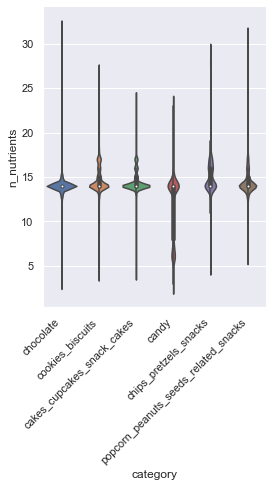

In [32]:
sns.set(rc={'figure.figsize':(3,3)})
ntr_combined = food_ntr.merge(ntr, on='nutrient_id', how='left')
comb = ntr_combined.merge(food, on='idx')
idx_n_nur = comb.groupby('idx').count()['nutrient_id'].rename('n_nutrients')
df = food.merge(idx_n_nur, left_on='idx', right_index=True)
sns.catplot(x='category', y='n_nutrients', data=df, kind='violin')
_ = plt.xticks(rotation=45, horizontalalignment='right')

Pretty similar as well...maybe the 'candy' distribution looks a little bit different, but nothing major.<br>
Are there nutrients that exist not in all categories, but only in a few? Are there nutrients that exist only in ONE category?

Here we can see a graph for each category.
In each graph, we see the nutrients that exist in this category, and are absent in at least one other category. So, value of 1 will meant that this nutrient is exclusive for this category, and a value of 5 will mean that this nutrient exists in 4 other categories as well. (code hidden)

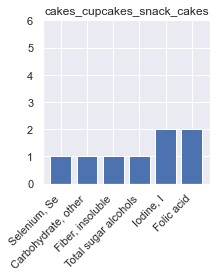

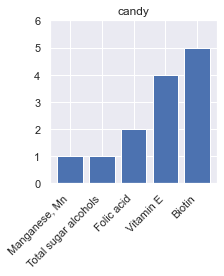

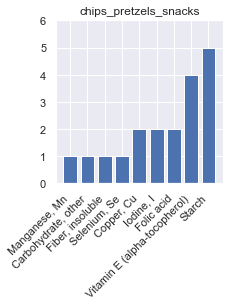

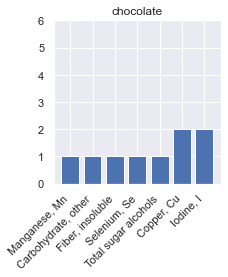

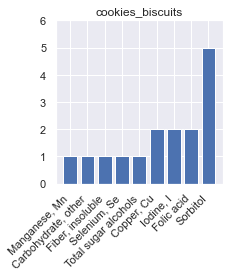

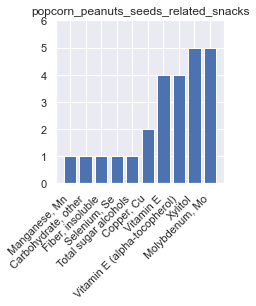

In [33]:
category_dict =get_unq_values_cat()
for c in category_dict:
    cur_dic = category_dict[c]
    plt.bar(range(len(cur_dic)), sorted(list(cur_dic.values())), align='center')
    plt.xticks(range(len(cur_dic)), sorted(cur_dic, key = cur_dic.get),rotation= 45, horizontalalignment='right')
    plt.ylim((0,6))
    plt.title(c)
    plt.show()

We see that some categories, like choclate, popcorn_peanuts_seeds_related_snacks and cookies_biscuits have more exclusive nutrients than others, but not by much, so maybe it's not very interesting.

We can of course perform the same exploration as we've done on ingridients and description (does not appear here because it will be quite repetative and we have to stop somewhere). By doing this we'll be able to see which nutrients are more indicative than others, altought we already see part of the picture from the graphs above.

## Images

let's look on the images dimensions:

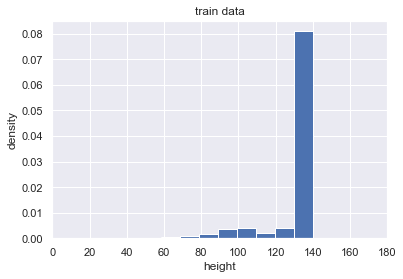

In [7]:
train_img_height = plot_img_attribute('train', 'height')

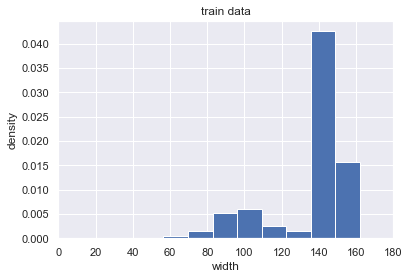

In [8]:
train_img_width = plot_img_attribute('train', 'width')

We can see that width distribution tends to get higher values than height distribution, and the maximum value of both distributions is not bigger than 160-170 . Therefore, when we will extract our images to our CNN we will resahpe them to be at size of 160*160.

let's also compare imageד dimensions of the train group to images dimensions of the test group:

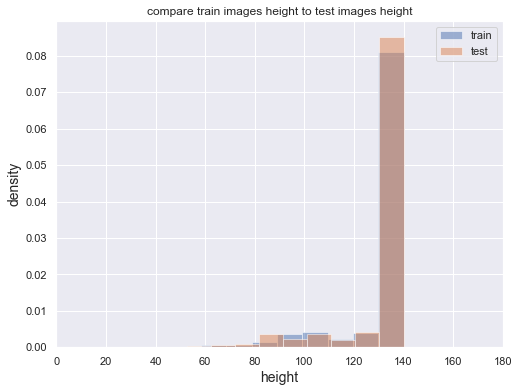

In [9]:
compre_train_test_img('height')

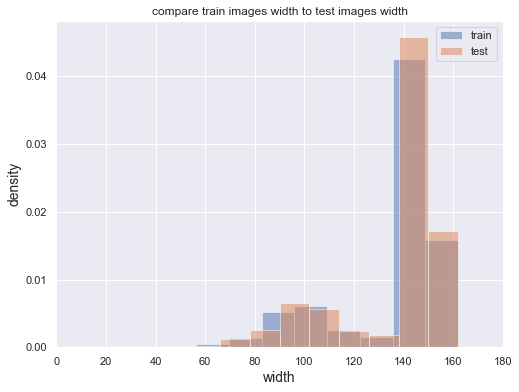

In [10]:
compre_train_test_img('width')

We see that both distributions are similar so at least according to images dimensions, it seems we can use images to predict food labels.

## Conclusions

Obviously, there are more connections and relations to explore here, but we think it's comprehansive enough for the task at hand, and if we feel that we lack some understanding of the data for better prediction, we'll come back here.<br>
Overall, our main impressions from the data explorations are:

1) Almost no missing data, horray! <br>
2) We strongly believe that the most meaningful features are going to be the textual ones - brand, description, etc.<br>
3) Serving size is interesing for 1 category but not very much so for the rest.<br>
4) Might be worth adding "number of ingredients" as a new feature.<br>
5) Maybe we just lack the expertise, but plotting only categorical data is slightly less fun and nice than numeric data :)<br>

Let's do some NN!

And a meme for dessert:
<img src="./images/meme1.png"
     alt="another meme"
     width="200"
     height="200"
     style="float: center;" />